# **Objective of the Workshop**
The objective of this workshop is to provide students with hands-on experience in applying linear and multiple regression techniques to analyze environmental data. By working with real-world climate and ecosystem variables, students will gain insights into how regression models can be used to identify relationships between key environmental factors, make predictions, and support data-driven decision-making.

**Through this workshop, you will:**

* Understand the concepts of linear and multiple regression and their applications in environmental science.
* Explore feature selection and correlation analysis to determine key influencing factors.
* Implement regression models using Python (Pandas, Scikit-learn, and Matplotlib/Seaborn).
* Evaluate model performance using metrics such as R-squared and Mean Squared Error (MSE).
* Interpret regression outputs and derive meaningful conclusions from the results.

## Importing the required packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split

### Task 1 Import Wetland data and create a Pandas DataFrame

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Assignment_workshop_5/Assessment_Data-20250304"
# please change the path according to the location of your data

/content/drive/MyDrive/Assignment_workshop_5/Assessment_Data-20250304


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

combined_output.csv                           PRSA_Data_Huairou_20130301-20170228.csv
PRSA_Data_Aotizhongxin_20130301-20170228.csv  PRSA_Data_Nongzhanguan_20130301-20170228.csv
PRSA_Data_Changping_20130301-20170228.csv     PRSA_Data_Shunyi_20130301-20170228.csv
PRSA_Data_Dingling_20130301-20170228.csv      PRSA_Data_Tiantan_20130301-20170228.csv
PRSA_Data_Dongsi_20130301-20170228.csv        PRSA_Data_Wanliu_20130301-20170228.csv
PRSA_Data_Guanyuan_20130301-20170228.csv      PRSA_Data_Wanshouxigong_20130301-20170228.csv
PRSA_Data_Gucheng_20130301-20170228.csv


# **Reading the FuelConsumption data**

In [ ]:
df=pd.read_csv('combined_output.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
420764,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
420765,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
420766,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


## Data exploration

###  Task 2: Inspect the first few rows of the DataFrame and summarise the descriptive statistics of the data

In [ ]:
# Summarise the data
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
cdf=df[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']]
cdf

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,5.7
1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,3.9
2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,5.3
3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,4.9
4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,3.2
...,...,...,...,...,...,...,...,...,...,...,...
420763,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,1.8
420764,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,1.3
420765,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,1.5
420766,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,3.2


## Task 3: Plot to check whether the relationship between the independent and dependent variable is linear or not

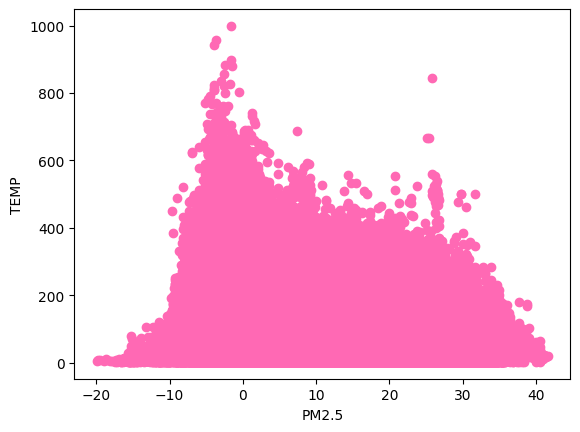

In [ ]:
plt.scatter( cdf['TEMP'], cdf['PM2.5'], color='hotpink')
plt.xlabel("PM2.5")
plt.ylabel("TEMP")
plt.show()

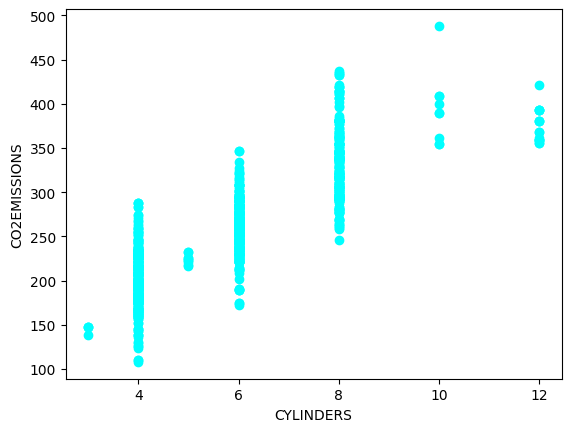

In [ ]:
plt.scatter(df.NO2,df.TEMP, color='cyan')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

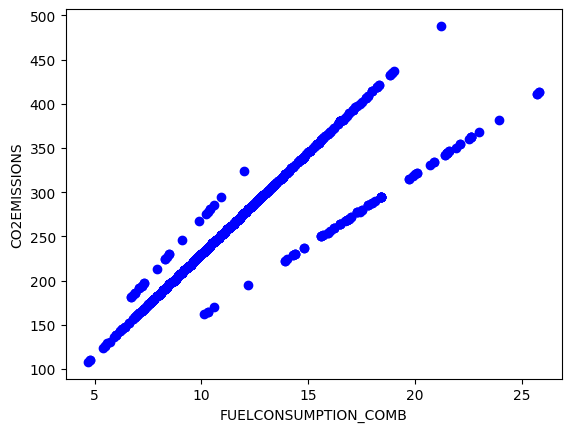

In [ ]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()


Which of the above variables do you think will work best to explain a linear relation with CO2 emission?

## Task 4: Train-test data preparation

In [ ]:
X=df[['FUELCONSUMPTION_COMB']]
X


,FUELCONSUMPTION_COMB
0,8.5
1,9.6
2,5.9
3,11.1
4,10.6
...,...
1062,11.8
1063,11.5
1064,11.8
1065,11.3


In [ ]:
y=df[['CO2EMISSIONS']]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train)

      ENGINESIZE
532          3.7
160          2.0
769          5.5
191          6.2
485          3.5
...          ...
901          3.6
402          2.0
587          3.6
822          2.0
1009         3.5

[853 rows x 1 columns]


In [ ]:
print(X_test)

      ENGINESIZE
944          2.0
745          3.5
823          2.0
353          3.5
333          1.4
...          ...
768          4.7
147          3.6
556          5.0
476          6.2
1028         3.6

[214 rows x 1 columns]


In [ ]:
print(y_train)

      CO2EMISSIONS
532            283
160            232
769            304
191            294
485            221
...            ...
901            251
402            165
587            250
822            198
1009           253

[853 rows x 1 columns]


In [ ]:
print(X_test)

      ENGINESIZE
944          2.0
745          3.5
823          2.0
353          3.5
333          1.4
...          ...
768          4.7
147          3.6
556          5.0
476          6.2
1028         3.6

[214 rows x 1 columns]


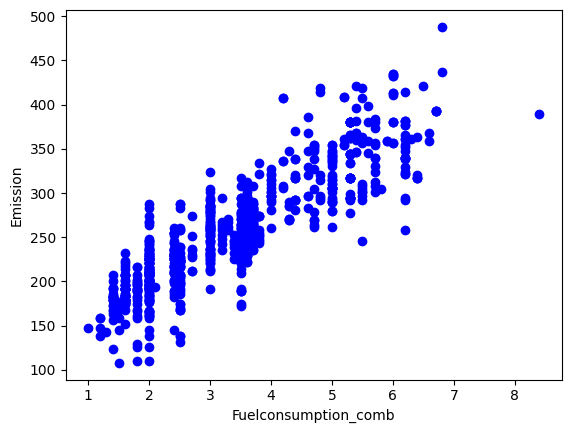

In [ ]:
# Train data distribution
plt.scatter(X_train,y_train, color='blue')
plt.xlabel("Fuelconsumption_comb")
plt.ylabel("Emission")
plt.show()

## Task 5: Using sklearn package for data modelling

In [ ]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[39.9945648]]
Intercept: [123.14720693]


Text(0, 0.5, 'Emission')

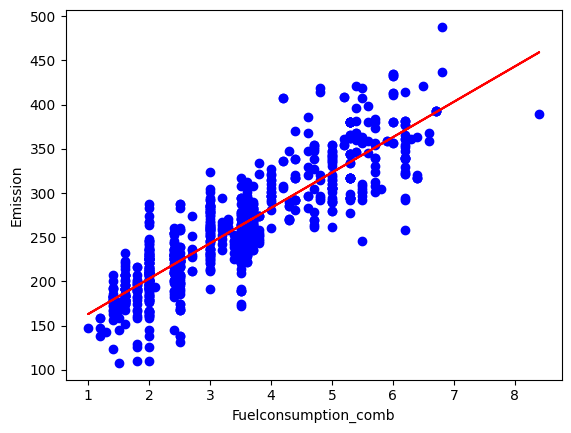

In [ ]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("Fuelconsumption_comb")
plt.ylabel("Emission")

## Task 6: Model evaluation

In [ ]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 24.84
Residual sum of squares (MSE): 1024.10
R2-score: 0.70
